In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

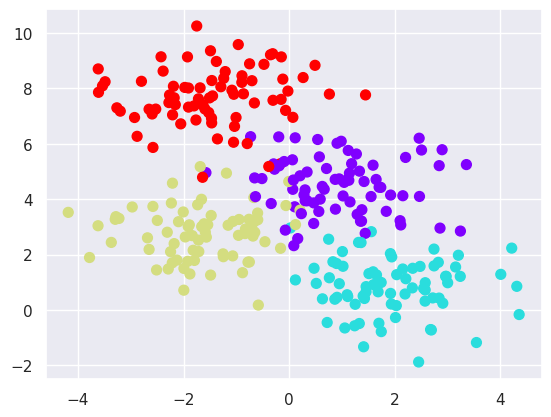

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [9]:
X.shape

(300, 2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_model = DecisionTreeClassifier()

In [21]:
tree_model.fit(X,y)

DecisionTreeClassifier()

In [41]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    # model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    # return (xx, yy, Z)

/tmp/ipykernel_1643/429885856.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


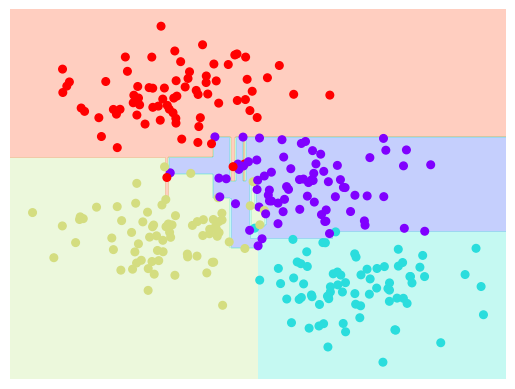

In [38]:
visualize_classifier(X,y,10)

In [42]:
tree_model = DecisionTreeClassifier(max_depth=2).fit(X,y)

/tmp/ipykernel_1643/3556186786.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


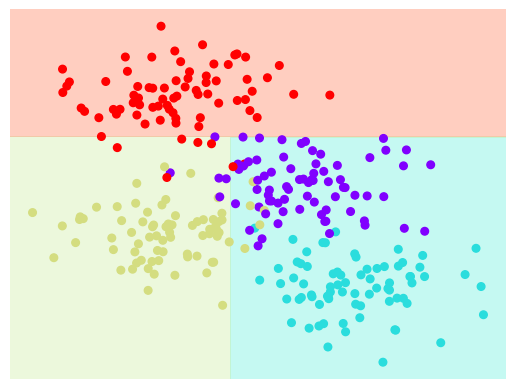

In [43]:
visualize_classifier(tree_model,X,y)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

/tmp/ipykernel_1643/3556186786.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


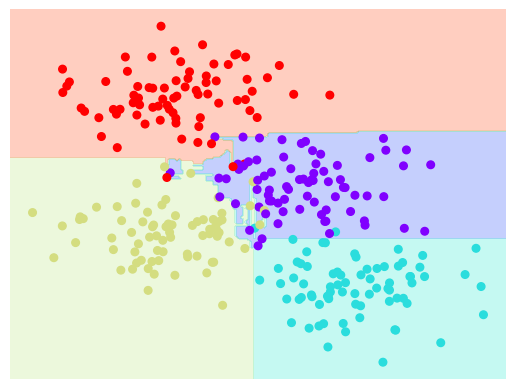

In [45]:
tree_model = DecisionTreeClassifier()
bag = BaggingClassifier(tree_model, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X,y)
visualize_classifier(bag, X, y)

/tmp/ipykernel_1643/3556186786.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


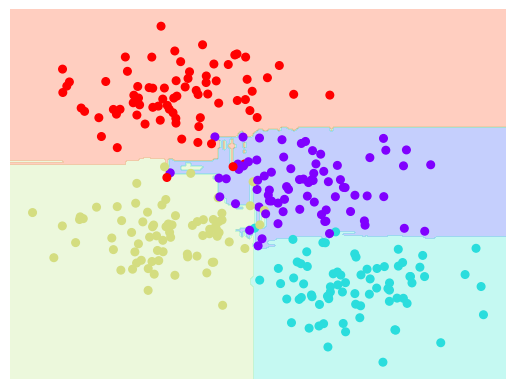

In [47]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X,y)
visualize_classifier(rf_model, X,y)

In [48]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(rf_model.fit(X,y).predict(X), y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [52]:
## 차원축소

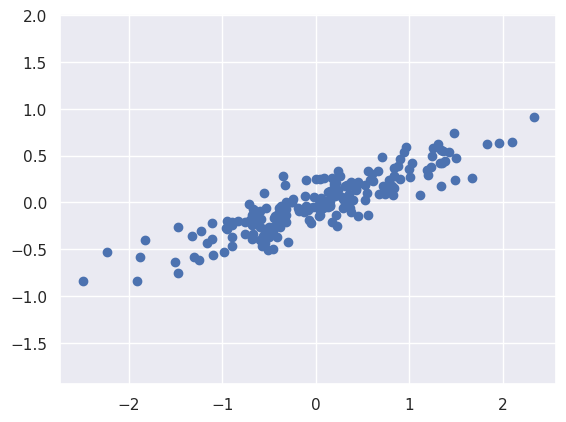

In [51]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [55]:
# 아이젠 백터(Eigen vector)는 선형 변환을 통해 자기 자신의 상수배로만 변환되는 벡터입니다. 
# 이 벡터는 고유값(Eigen value)과 함께 사용되며, 고유값은 해당 벡터가 변환되는 크기를 나타냅니다.
# 아이젠 백터와 고유값은 다양한 분야에서 활용됩니다. 
# 머신러닝에서는 주성분 분석(PCA)에서 아이젠 백터와 고유값을 사용하여 데이터를 차원 축소하는 데 활용됩니다.

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)

In [58]:
pca.fit(X)

PCA(n_components=2)

In [59]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


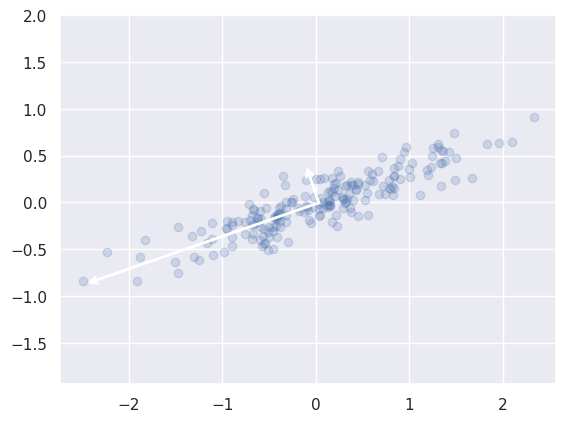

In [60]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [61]:
from sklearn.datasets import load_iris

In [70]:
X = load_iris()['data']
y = load_iris()['target']

In [71]:
pca = PCA(2)

In [72]:
X_pca = pca.fit_transform(X)

In [73]:
X.shape, X_pca.shape

((150, 4), (150, 2))

In [74]:
y.shape

(150,)

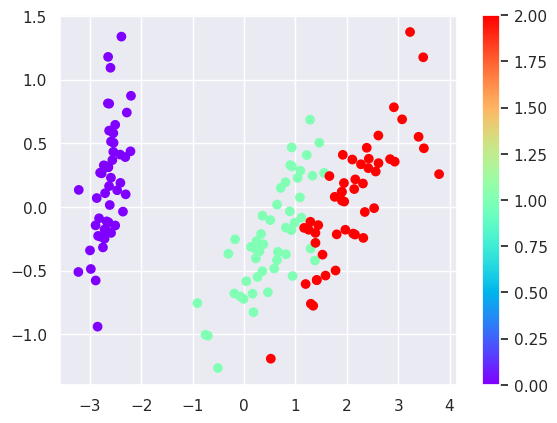

In [76]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow')
plt.colorbar()
plt.show()

In [77]:
l = [1,2,3,4]
sum(l)/len(l)

2.5

In [142]:
class NumericList(list):
    def __init__(self, *args):
        super().__init__(args)
        
    def mean(self):
        return sum(self)/len(self)
    
    # def pop(self, x):
    #     self = self + [x]

In [143]:
n = NumericList(1,2,3,4)

In [144]:
n.append(5)

In [146]:
n.pop(1)

2

In [147]:
n.mean()

3.25

In [149]:
n.pop(2)

4

In [150]:
n

[1, 3, 5]

In [151]:
## 

In [177]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [157]:
X = load_digits()

In [159]:
X = load_digits()['data']
y = load_digits()['target']

In [178]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [179]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [180]:
X.shape

(1797, 64)

In [181]:
X_img = X.reshape(-1,8,8)

In [182]:
X_img.shape

(1797, 8, 8)

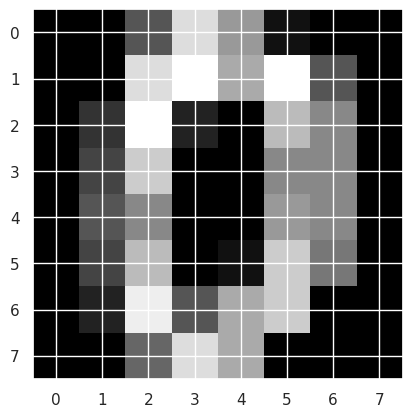

In [183]:
import matplotlib.pyplot as plt
plt.imshow(X_img[0], cmap='gray')

In [184]:
from sklearn.decomposition import PCA

In [185]:
pca = PCA(2)
pca.fit(X_scaled)

PCA(n_components=2)

In [171]:
X_pca = pca.transform(X)

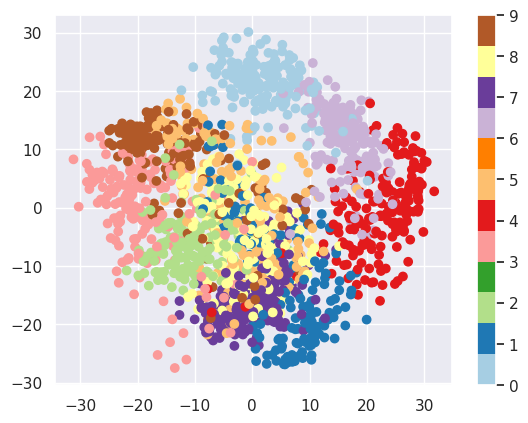

In [176]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Paired')
plt.colorbar()
plt.show()

In [186]:
pca = PCA().fit(X.data)

In [189]:
np.cumsum(pca.explained_variance_ratio_) ## 누적합

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

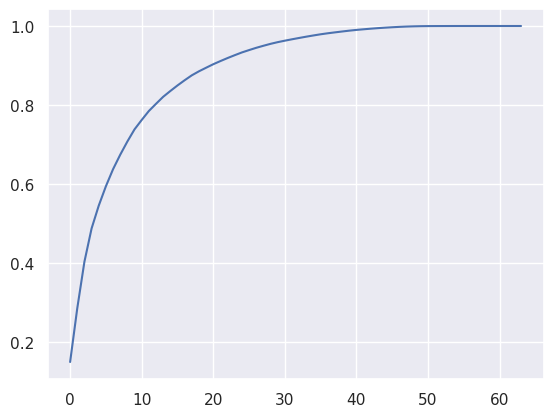

In [193]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [197]:
# digits = load_digits()

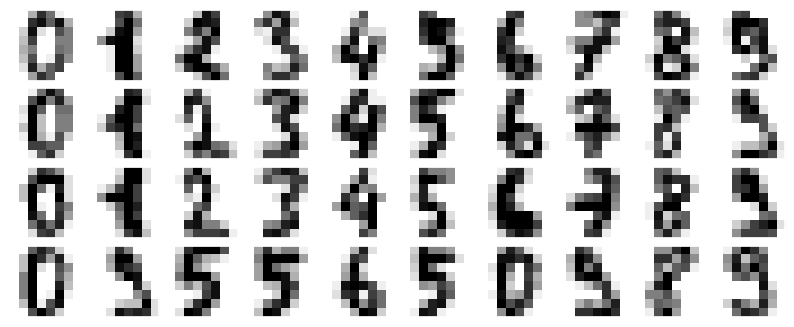

In [212]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(X)

In [211]:
# plot_digits(X)

In [201]:
np.random.seed(42)
noisy = np.random.normal(X, 4)
# plot_digits(noisy)

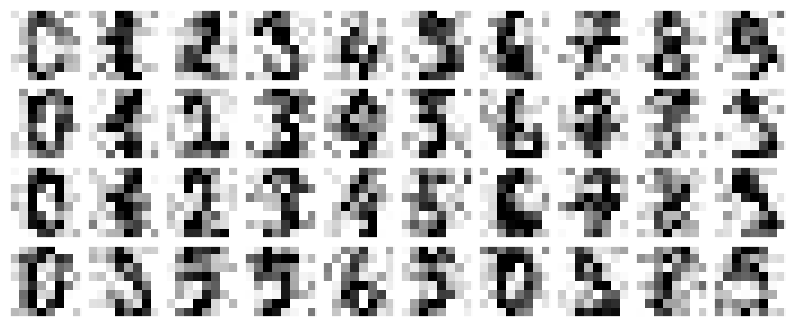

In [203]:
plot_digits(noisy)

In [204]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

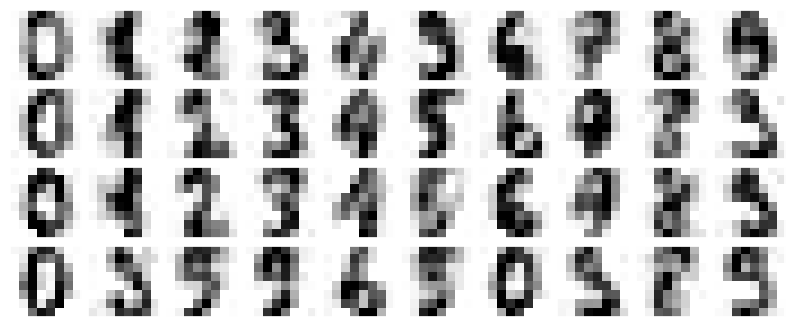

In [209]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [213]:
## manifold learning ##  국부지역 러닝

In [214]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

/tmp/ipykernel_1643/1703149913.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))


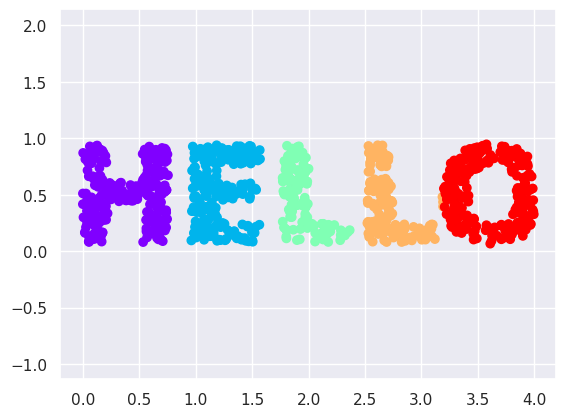

In [219]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

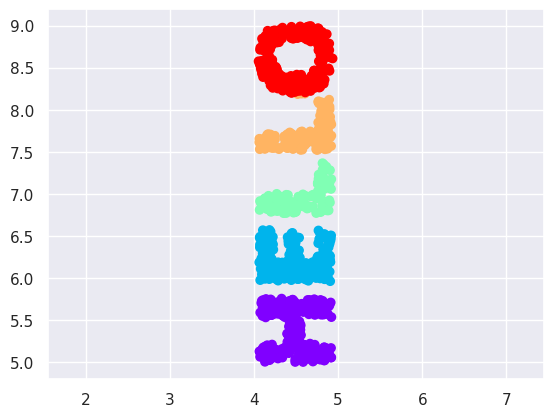

In [217]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 90) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [223]:
X = np.array(
    [[1,2],
    [1,0]]
)

from sklearn.metrics import pairwise_distances

In [224]:
pairwise_distances(X)

array([[0., 2.],
       [2., 0.]])

In [229]:
import itertools

In [230]:
l = [1,2,3,4]

In [233]:
list(itertools.filterfalse(lambda x:x >3, l))

[1, 2, 3]

In [234]:
itertools.takewhile??

Init signature: itertools.takewhile(predicate, iterable, /)
Docstring:      Return successive entries from an iterable as long as the predicate evaluates to true for each entry.
Type:           type
Subclasses:     

In [235]:
## KMeans

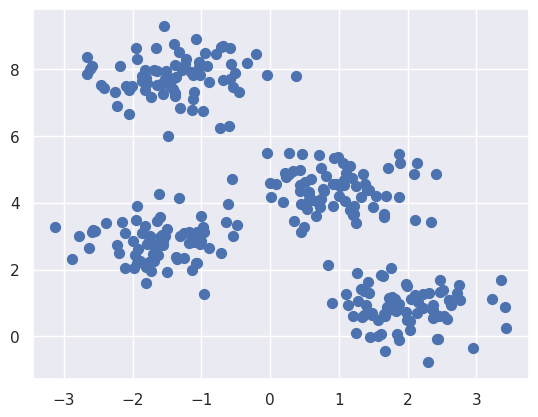

In [238]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [243]:
import warnings
warnings.filterwarnings(action='ignore')

In [246]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd8fc98a790>
Traceback (most recent call last):
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_m

KMeans(n_clusters=4)

In [247]:
y_kmeans =km.predict(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd8ef46c820>
Traceback (most recent call last):
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [248]:
y_kmeans

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3], d

In [249]:
km.labels_

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3], d

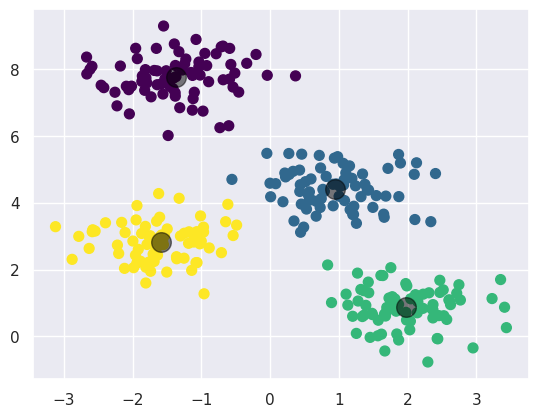

In [250]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [259]:
X = load_iris()['data']
y = load_iris()['target']

In [260]:
X.shape

(150, 4)

In [261]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

In [264]:
km = KMeans(3)
centers = km.fit(X_pca).cluster_centers_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd8ef4a40d0>
Traceback (most recent call last):
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_m

In [265]:
centers

array([[ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ]])

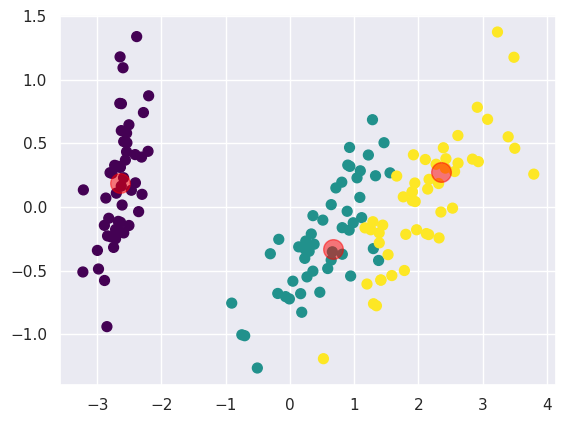

In [267]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [271]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd93954b820>
Traceback (most recent call last):
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_m

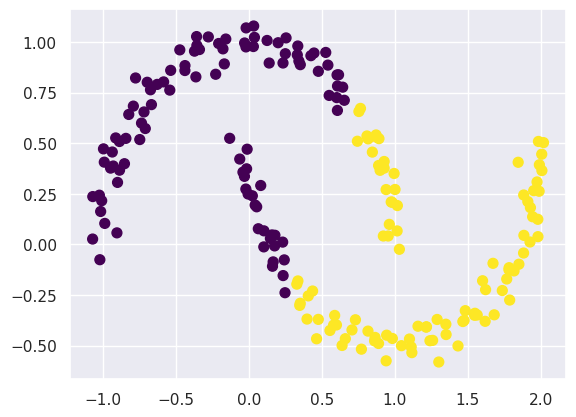

In [272]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')


In [275]:
# labels = KMeans(2, random_state=0).fit_predict(X)
# centers = KMeans(2, random_state=0).cluster_centers_

# plt.scatter(X[:, 0], X[:, 1], c=labels,
#             s=50, cmap='viridis');

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd9394065e0>
Traceback (most recent call last):
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_m

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [276]:
from sklearn import cluster

In [277]:
from sklearn.cluster import DBSCAN

In [285]:
den = DBSCAN(.2) ## 입실론 =>> 경계선

In [282]:
den.get_params()

{'algorithm': 'auto',
 'eps': 0.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [283]:
den.fit(X)

DBSCAN(eps=0.2)

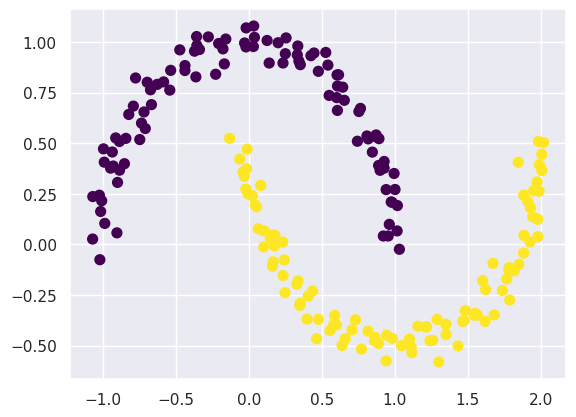

In [284]:
plt.scatter(X[:,0], X[:,1], c=den.labels_, s=50, cmap='viridis' )

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd93933aee0>
Traceback (most recent call last):
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_m

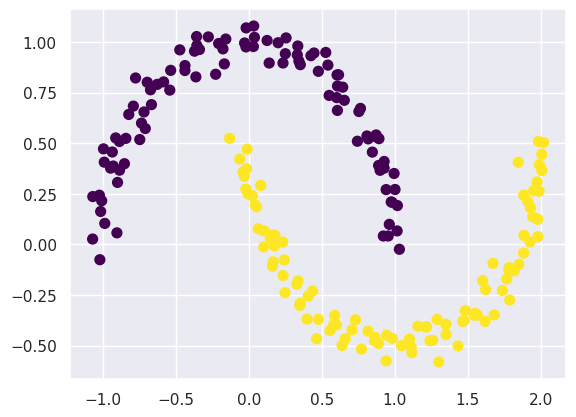

In [286]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## 타이타닉

In [842]:
def data_info(df):
    return pd.DataFrame({'NullCheck': df.isna().sum(), 'DataType':df.dtypes }), len(df)

In [843]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

In [844]:
tipd = pd.DataFrame(titanic)

In [845]:
tipd

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [846]:
df_info = data_info(titanic)

In [847]:
# data_info = pd.DataFrame( {'NullCheck' :titanic.isna().sum(), 'DataType' : titanic.dtypes} 

In [848]:
df_info

(             NullCheck  DataType
 survived             0     int64
 pclass               0     int64
 sex                  0    object
 age                177   float64
 sibsp                0     int64
 parch                0     int64
 fare                 0   float64
 embarked             2    object
 class                0  category
 who                  0    object
 adult_male           0      bool
 deck               688  category
 embark_town          2    object
 alive                0    object
 alone                0      bool,
 891)

In [849]:
data_info(titanic)

(             NullCheck  DataType
 survived             0     int64
 pclass               0     int64
 sex                  0    object
 age                177   float64
 sibsp                0     int64
 parch                0     int64
 fare                 0   float64
 embarked             2    object
 class                0  category
 who                  0    object
 adult_male           0      bool
 deck               688  category
 embark_town          2    object
 alive                0    object
 alone                0      bool,
 891)

In [850]:
titanic.rename(columns={'class':'class_'}, inplace=True)

In [851]:
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [852]:
titanic.drop(columns=['deck'], inplace=True)

In [853]:
titanic = titanic.loc[~titanic.embarked.isna() , :]

In [854]:
def encoder(df):
    cols = df.dtypes.index[(df.dtypes == 'object') | (df.dtypes == 'category')]
    dt = np.zeros((df.shape[0],len(cols)), dtype=np.int)
    for idx, col in enumerate(cols):
        tmp = LabelEncoder().fit_transform(df[col])
        dt[:, idx] = tmp
        # dt = np.concatenate([dt, tmp], axis=1)
    return dt

In [855]:
new_dt = encoder(titanic)

In [856]:
drop_cols = titanic.dtypes.index[(titanic.dtypes == 'object') | (titanic.dtypes == 'category')]
titanic.drop(columns=drop_cols, inplace=True)

In [857]:
new_dt = new_dt[:, :-1]

In [858]:
X = titanic.iloc[:,1:-1]
y = titanic.iloc[:,0]
X = np.c_[X.values, new_dt]

In [859]:
X.shape

(889, 11)

In [860]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [861]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [862]:
clfs = [SVC, LogisticRegression, GaussianNB, DecisionTreeClassifier, RandomForestClassifier,
       AdaBoostClassifier, KNeighborsClassifier, XGBClassifier]

In [863]:
for clf in clfs:
    model_name = repr(clf).split(' ')[1].split('.')[-1][:-2]
    tmp = clf().fit(X_train, y_train)
    score = tmp.score(X_test, y_test)
    print( model_name, '=======>', score)    

SVC =======> 0.6278026905829597
LogisticRegression =======> 0.852017937219731
GaussianNB =======> 0.8161434977578476
DecisionTreeClassifier =======> 0.7892376681614349
RandomForestClassifier =======> 0.8161434977578476
AdaBoostClassifier =======> 0.820627802690583
KNeighborsClassifier =======> 0.7085201793721974
XGBClassifier =======> 0.7802690582959642


In [864]:
def maxim_model(model, X, y):
    model_name = [repr(clf).split(' ')[1].split('.')[-1][:-2] for clf in clfs]
    clf_ind = [i for i, v in enumerate(model_name) if v == model][0]
    clf = clfs[clf_ind]()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    return score

In [865]:
maxim_model('LogisticRegression', X, y)

0.852017937219731

In [866]:
from sklearn.ensemble import VotingClassifier

In [867]:
svc_model = SVC()
l_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
vote = VotingClassifier(estimators=[('svc_model', SVC()), 
                                    ('l_model', LogisticRegression()), 
                                    ('tree_model', DecisionTreeClassifier())], 
                        voting='hard')

In [868]:
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('svc_model', SVC()),
                             ('l_model', LogisticRegression()),
                             ('tree_model', DecisionTreeClassifier())])

In [869]:
from sklearn.metrics import accuracy_score
accuracy_score(vote.predict(X_test), y_test)

0.8340807174887892

In [923]:
class MyVoting:
    def __init__(self, method, *models):
        self._model = models
        self._method = method
        
    def fit(self, x, y):
        self.clfs = []
        self.y = y
        for model in self._model:
            # print(model)
            if isinstance(model(), SVC):
                param = {'probability':True}
                clf = model(**param).fit(x,y)
            else:
                clf = model().fit(x,y)
            self.clfs.append(clf)
        return self.clfs
    
    def predict(self,x):
        try:
            if self._method == 'hard':
                result = np.zeros((len(x), len(self._model)))
            else:
                result = np.zeros((len(x), np.unique(self.y).size))
            for idx, clf in enumerate(self.clfs):
                if self._method == 'hard':
                    result[:,idx] = clf.predict(x)
                else:
                    result += clf.predict_proba(x)
                    
                if self._method == 'hard':
                    self.result = np.where(np.sum(result, axis=1)/len(self._model) > 0.5, 1, 0)
                else:
                    self.result = np.argmax(result, axis=1)
                    
            return self.result
        except Exception as e:
            print(e, 'fit 메소드를 실행하세요')
            
    def score(self, x, y):
        try:
            self.score = np.sum(self.predict(x) == y)/len(y)
            return self.score
        except:
            print(' fit 메소드를 실행하세요')
            

In [924]:
## soft에서 SVC 적용 불가

In [925]:
vote = MyVoting('soft', SVC, RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, XGBClassifier)

In [926]:
vote.fit(X_train, y_train)

[SVC(probability=True),
 RandomForestClassifier(),
 LogisticRegression(),
 DecisionTreeClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

In [927]:
vote.score(X_test, y_test)

0.8340807174887892